<a href="https://colab.research.google.com/github/KabirKhancs88/World-Population-Central-Tendency/blob/main/World_Population.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
url ="/content/archive.zip"
da=pd.read_csv(url)

# New Section

In [5]:
da.head()

,Country,Population 2024,Population 2023,Area (km2),Density (/km2),Growth Rate,World %,World Rank
0,India,1441719852,1428627663,3M,485.0,0.0092,0.1801,1
1,China,1425178782,1425671352,9.4M,151.0,-0.0003,0.1780,2
2,United States,341814420,339996563,9.1M,37.0,0.0053,0.0427,3
3,Indonesia,279798049,277534122,1.9M,149.0,0.0082,0.0350,4
4,Pakistan,245209815,240485658,770.9K,318.0,0.0196,0.0306,5


In [6]:
da.columns

Index(['Country', 'Population 2024', 'Population 2023', 'Area (km2)',
       'Density (/km2)', 'Growth Rate', 'World %', 'World Rank'],
      dtype='object')

In [7]:
da['Population 2024']

0      1441719852
1      1425178782
2       341814420
3       279798049
4       245209815
          ...    
229          4372
230          3803
231          1935
232          1915
233           526
Name: Population 2024, Length: 234, dtype: int64

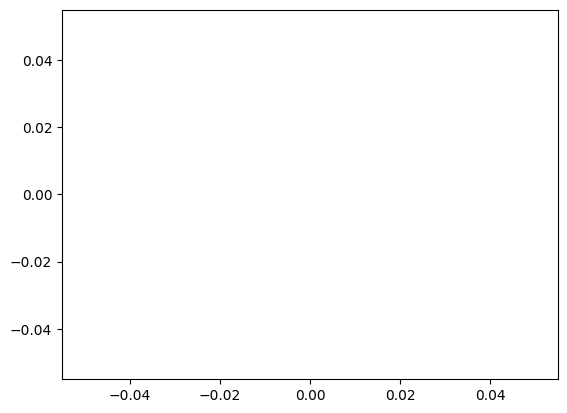

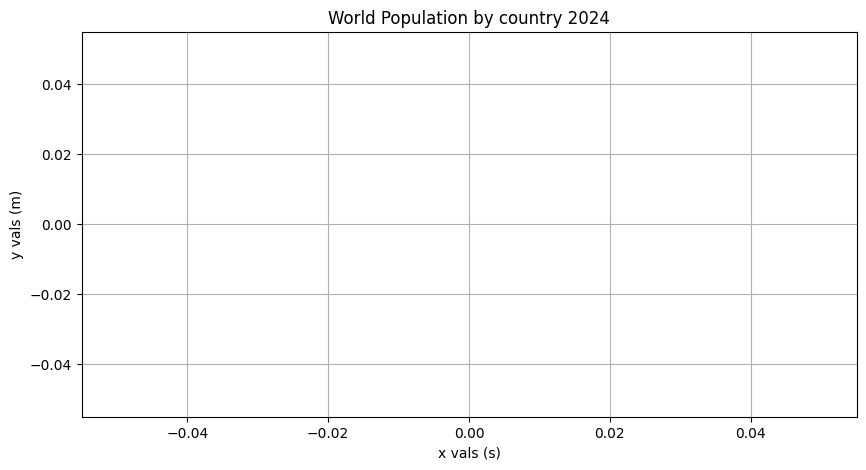

In [10]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot()
plt.show()

plt.figure(figsize=(10, 5))

# add a line renderer with legend and line thickness
plt.plot()

# also need to make the figure readable -- very important from stats perspective!
plt.title("World Population by country 2024")
plt.xlabel("x vals (s)")
plt.ylabel("y vals (m)")
plt.grid()

plt.show()


In [11]:
da['Population 2024'].size

234

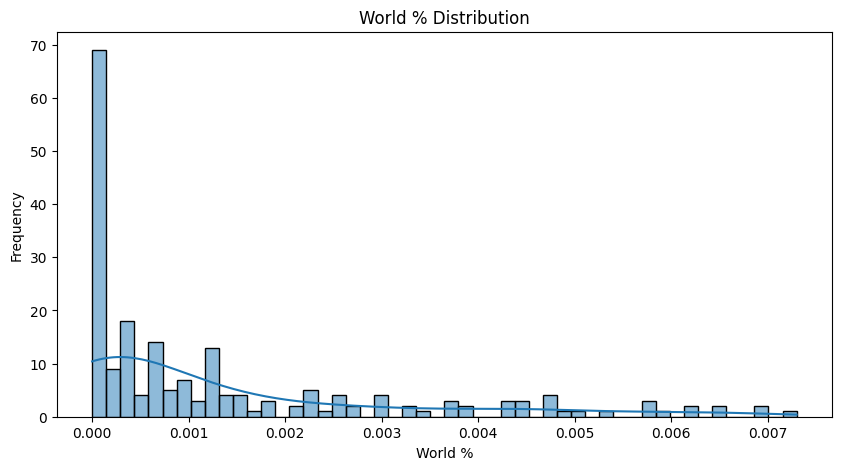

In [42]:
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.histplot(da['World %'], bins=50, kde=True)
plt.title('World % Distribution')
plt.xlabel('World %')
plt.ylabel('Frequency')
plt.show()

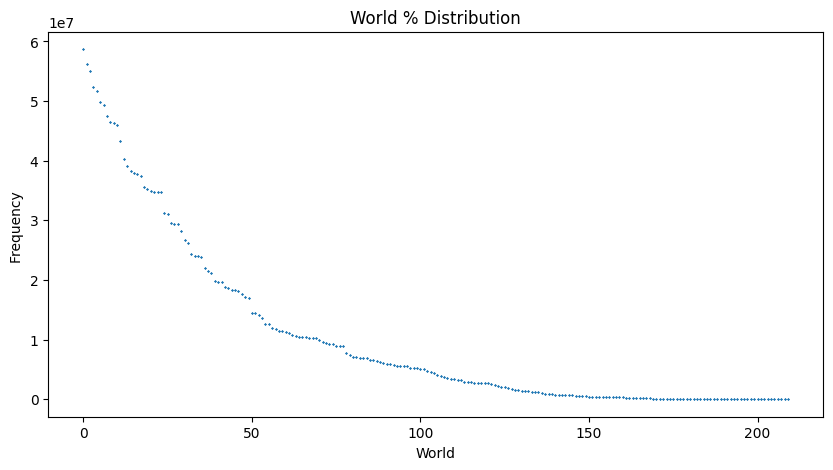

In [43]:
## Plotting Weights
# create a figure
plt.figure(figsize=(10, 5))

# add a line renderer with legend and line thickness
x =  range(da['Population 2024'].size)
y =  da['Population 2024']

plt.scatter(x, y, marker='x', s=0.5)

# also need to make the figure readable -- very important from stats perspective!
plt.title("World % Distribution")
plt.xlabel("World")
plt.ylabel("Frequency ")

plt.show()

In [45]:
sum(y)

2203023339

In [46]:
y = y.dropna()    # just remove the values with NaN

In [47]:
sum(y) / len(y)

10490587.32857143

In [48]:
#Checking the central tendency
mean=sum(y)/len(y)
print(mean)

10490587.32857143


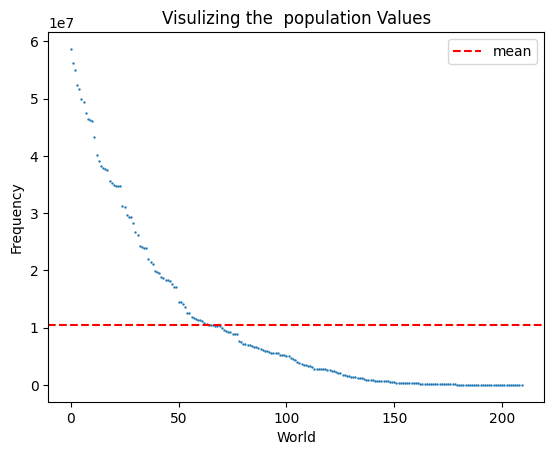

In [49]:
#Visualizing the mean
plt.scatter(x,y,s=0.5)
plt.title('Visulizing the  population Values')
plt.xlabel('World')
plt.ylabel('Frequency')
plt.axhline(mean,color='red',linestyle='--',label='mean')
plt.legend()
plt.show()

In [50]:
import numpy as np

var= np.var(da['Population 2024'])
print(var)

202581780255106.6


In [51]:
#Finding standard deviation
std_dev= np.sqrt(var)
print(std_dev)


14233122.645965874


In [52]:
#Finding the cofficant of variance
cv=(std_dev/mean)*100
print(cv)

135.67517432700396


In [53]:
Q1 = da['Population 2024'].quantile(0.25)
Q3 = da['Population 2024'].quantile(0.75)
IQR = Q3 - Q1
Inter_QRange=Q3-Q1
print(Q1)
print(Q3)
print(Inter_QRange)

343242.75
13957968.25
13614725.5


In [54]:
lower_bound= Q1-1.5* Inter_QRange
print(lower_bound)
upper_bound= Q3+1.5* Inter_QRange
print(upper_bound)

-20078845.5
34380056.5


In [55]:
outliers = da[(da['Population 2024'] < lower_bound) | (da['Population 2024'] > upper_bound)]['Population 2024']
print("These values are outliers:")
print(outliers)
print("Number of outliers:", outliers.count())

These values are outliers:
24    58697744
25    56203030
26    54964694
27    52340774
28    51741963
29    49924252
30    49358228
31    47473373
32    46523657
33    46278751
34    46057866
35    43372950
36    40221726
37    39107046
38    38211459
39    37937821
40    37804634
41    37473929
42    35673804
43    35219853
44    34858402
45    34777522
46    34683444
47    34671895
Name: Population 2024, dtype: int64
Number of outliers: 24


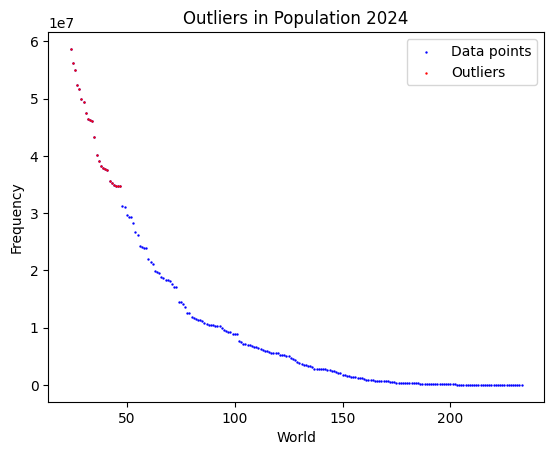

In [56]:
# Plotting the actual data points and outliers
plt.scatter(da['Population 2024'].index, da['Population 2024'] , color='blue', label='Data points' , s=0.5)
plt.scatter(outliers.index, outliers, color='red', label='Outliers',s=0.5)

plt.title('Outliers in Population 2024')
plt.xlabel('World')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [57]:
# Deleting the outliers
da = da[(da['Population 2024'] >= lower_bound) & (da['Population 2024'] <= upper_bound)]

In [58]:
# Calculating mean after removing outliers
mean_without_outliers = da['Population 2024'].mean()

print("Mean without outliers:", mean_without_outliers)

Mean without outliers: 6233572.698924731
